In [2]:
import keras
keras.__version__

'2.7.0'

# 신경망과의 첫 만남

In [1]:
# MNIST 데이터 사용
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

1. 훈련 데이터 `train_images`와 `train_labels`를 네트워크에 주입.
2. 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습.
3. `test_images`에 대한 예측을 네트워크에게 요청.
4. 예측이 `test_labels`와 맞는지 확인.

In [11]:
from keras import models
from keras import layers

network = models.Sequential()

# 완전 연결된 신경망 층 Dense 층 2개가 연속
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

컴파일 단계에 포함될 세 가지

1. 손실 함수: 훈련 데이터에서 신경망 성능 측정
2. 옵티마이저: 데이터, 손실 함수 기반으로 네트워크 업데이트 매커니즘
3. 훈련과 테스트 과정을 모니터링할 지표: 정확도

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# 'categorical_crossentropy'는 손실 함수로 미니 배치 확률적 경사 하강법을 통해 손실이 감소됨
# 'rmsprop' 옵티마이저에 의해 경사 하강법의 구체적인 방식이 결정

In [13]:
# 훈련 이미지에 맞는 크기로 조정
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
from keras.layers.normalization import layer_normalization

In [17]:
# 레이블을 범주형으로 인코딩
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
# 훈련 데이터에 모델 학습
# 훈련 데이터의 네트워크 손실과 정확도 출력됨(정확도 98.9% 금방 달성)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2615 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1063 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0713 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0509 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0387 - accuracy: 0.9890


In [22]:
# 테스트 세트 - 정확도 97.8%
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9776


In [23]:
print('test_acc:', test_acc)

test_acc: 0.9775999784469604


훈련 데이터보다 테스트 데이터에서의 정확도가 낮으므로 과대적합.

# 신경망을 위한 데이터 표현
----
텐서는 (대부분)수치형 데이터를 다루므로 숫자를 위한 컨테이너.

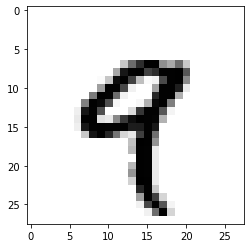

In [10]:
import matplotlib.pyplot as plt

# 다섯번째 샘플 확인
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [29]:
# 배치 데이터
# ex) 크기 128인 배치
batch = train_images[:128]

# 첫 번째 축 => 배치 축(배치 차원)

#### 텐서의 실제 사례

* 벡터 데이터: (samples, features) 크기의 2D 텐서
* 시계열 데이터, 시퀀스 데이터: (samples, timesteps, features) 크기의 3D 텐서
* 이미지 데이터: (samples, height, width, channels) or (samples, channels, height, width) 크기의 4D 텐서
* 비디오 데이터: (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 크기의 5D 텐서

# 신경망의 톱니바퀴: 텐서 연산
----
컴퓨터 프로그램을 이진수의 입력을 처리하는 몇 개의 이항 연산으로 표현할 수 있는 것처럼, 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산으로 나타낼 수 있음. ex) 텐서 덧셈, 텐서 곱셈

keras.layers.Dense(512, activation='relu')

이 층은 2D 텐서를 입력으로 받고 또 다른 2D 텐서를 반환하는 함수로 해석할 수 있음.

output = relu(dot(W, input) + b) 
* W는 2D 텐서, b는 벡터 (둘 모두 층의 속성)

위의 식에서는 3개의 텐서 연산 존재. 입력 텐서와 텐서 W 사이의 점곱(dot), 그것의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), relu(렐루) 연산 (relu(x)는 max(x, 0))

In [1]:
def naive_relu(x):
  assert len(x.shape) == 2          # x는 2D 넘파이 배열

  x = x.copy()                      # 입력 텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
      
  return x


def naive_add(x, y):
  assert len(x.shape) == 2          # x와 y는 2D 넘파이 배열
  assert x.shape == y.shape

  x = x.copy()                      # 입력 텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
      
  return x

* 넘파이 배열을 다룰 때는 최적화된 넘파이 내장 함수로 연산들 처리
* 넘파이는 시스템에 설치된 BLAS 구현에 복잡한 일들을 위임
* BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서 조작 루틴(포트란, C 언어로 구현)

In [19]:
import numpy as np

x = 2
y = 3

z = x + y               # 원소별 덧셈
z = np.maximum(z, 0.)   # 원소별 렐루 함수

### 브로드캐스팅
Dense 층에서 2D 텐서와 벡터를 더한 것처럼 크기가 다른 두 텐서가 더해질 때 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 **브로드캐스팅** 된다.

브로드캐스팅의 두 단계

1. 큰 텐서의 ndim에 맞도록 작은 텐서에 브로드캐스팅 축이 추가됨.
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨. 

In [20]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2          # x는 2D 넘파이 배열
  assert len(y.shape) == 2          # y는 넘파이 벡터
  assert x.shape[1] == y.shape[0]

  x = x.copy()                      # 입력 텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
      
  return x


# 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum 연산을 적용
x = np.random.random((64, 3, 32, 10))   # x는 (64, 3, 32, 10) 크기의 랜덤 텐서
y = np.random.random((32, 10))          # y는 (32, 10) 크기의 랜덤 텐서

z = np.maximum(x, y)     # 출력 z의 크기는 (64, 3, 32, 10)로 x와 동일

### 텐서 점곱
텐서 곱셈이라고도 불리며 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킴.
넘파이와 켈스는 점곱 연산에 보편적인 dot 연산자 사용.

* 두 벡터의 점곱은 스칼라가 되어 원소 개수가 같은 벡터끼리 점곱이 가능
* 행렬과 벡터 사이에서도 점곱이 가능
* 두 텐서 중 하나라도 ndim이 1보다 크면 dot 연산에 교환 법칙이 성립되지 않음(dot(x, y)와 dot(y, x)가 같지 않음)

### 텐서 크기 변환
특정 크기에 맞게 열과 행을 재배열하는 것이며, 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일함. 자주 사용하는 특별한 크기 변환은 전치임.

### 텐서 연산의 기하학적 해석
텐서가 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석될 수 있기 때문에 모든 텐서 연산은 기하학적 해석이 가능함. 

예를 들어 벡터의 덧셈에서 기하학적으로는 벡터 화살표를 연결하여 계산할 수 있으며, 그 최종 위치는 두 벡터의 덧셈을 나타내는 벡터가 됨.

일반적으로 아핀 변환, 회전, 스케일링 등 기본적인 기하학적 연산은 텐서 연산으로 표현될 수 있음.

### 딥러닝의 기하학적 해석
단순한 단계들이 길게 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것으로 해석할 수 있음.

심층 네트워크의 각 층은 데이터를 조금씩 풀어 주는 변환을 적용하므로, 이런 층을 길게 쌓으면 아주 복잡한 분해 과정을 처리할 수 있음.


# 신경망의 엔진: 그래디언트 기반 최적화
----
output = relu(dot(W, input) + b)

이 식에서 텐서 W와 b는 층의 속성으로 볼 수 있으며 가중치 또는 훈련되는 파라미터라고 부름(커널, 편향으로 부르기도 함). 

훈련 반복 루프

1. 훈련 샘플 x와 타깃 y의 배치를 추출.
2. x를 사용하여 네트워크 실행하고(정방향 패스 단계), 예측 y_pred를 구현.
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산.
4. 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트.

위의 훈련 반복 루프의 결과로 결국 훈련 데이터에서 네트워크의 속실, 즉 예측 y_pred와 타깃 y의 오차가 매우 작아짐.

특히, 4단계에서 개별적인 가중치 값이 있을 때 값이 증가해야 할지 감소해야 할지, 또 얼만큼 업데이트해야 할지 알아야 함. 
* 방법1. 네트워크 가중치 행렬의 원소를 모두 고정하고 관심 있는 하나만 다른 값을 적용. 하지만 이런 방식은 모든 가중치 행렬의 원소마다 두 번의 비용이 큰 정방향 패스를 계산해야 하므로 비효율적.
* 방법2. 신경망에 사용된 모든 연산이 미분 가능하다는 장점을 사용하여 네트워크 가중치에 대한 손실의 그래디언트를 계산. 그래디언트의 반대 방향으로 가중치를 이동하면 손실이 감소.

### 텐서 연산의 변화율: 그래디언트
그래디언트는 텐서 연산의 변화율로 다차원 입력, 즉 텐서를 입력으로 받는 함수에 변화율 개념을 확장시킨 것.








### 확률적 경사 하강법
신경망에서 가장 작은 손실 함수의 값을 만드는 가중치의 조합을 해석적으로 찾는 것을 의미함. 이때 실제 신경망에서는 파라미터의 개수가 수천 개보다 적은 경우가 거의 없고 종종 수천만 개가 되므로 해석적으로 해결하는 것이 어려움.

따라서 앞서 설명한 알고리즘 네 단계를 사용.

미니 배치 확률적 경사 하강법

1. 훈련 샘플의 배치 x와 타깃 y를 추출.
2. x로 네트워크 실행하고 예측 y_pred 구함.
3. 이 배치에서 y_pred와 y 사이의 오차를 측정, 네트워크의 손실을 계산.
4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산(역방향 패스).
5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시킴.ex) W -> step * gradient처럼 하면 배치에 대한 손실이 조금 감소.

스케일을 조정하기 위한 작은 값인 step의 값을 적절하게 고르는 것이 중요. 
* 너무 작으면 너무 많은 반복이 필요하고 지역 최솟값에 갇힐 수 있음.
* 너무 크면 손실 함수 곡선에서 완전히 임의의 위치로 이동시킬 수 있음.

미니 배치 SDG 알고리즘에서 반복마다 하나의 샘플과 하나의 타깃을 뽀는 것은 진정한 SDG이고, 극단적으로 반대인 가용한 모든 데이터를 사용하여 반복하는 것은 배치 SDG임. 이 두 가지 방법의 효율적인 절충안은 적절한 크기의 미니 배치를 사용하는 것.

업데이트할 다음 가중치 계산에서 현재 그래디언트 뿐만 아니라 이전에 업데이트된 가중치를 여러 가지 다른 방식으로 고려하는 최적화 방법(또는 옵티마이저)에는 *모멘텀을 사용한 SDG, Adagrad, RMSProp 등이 있음. 

*모멘텀 개념은 SDG에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결.

### 변화율 연결: 역전파 알고리즘
연쇄 법칙을 신경망의 그래디언트 계산에 적용하여 역전파 알고리즘(후진 모드 자동 미분이라고도 불림)이 탄생. 역전파는 최종 손실 값에서 시작하여 손실 값에 각 파라미터가 기여한 정도를 계산하기 위해 연쇄 법칙을 적용하여 최상위 층에서 하위 층까지 거꾸로 진행됨.

텐서플로처럼 기호 미분이 가능한 최신 프레임워크를 사용하여 신경망을 구현하여 역전파 알고리즘을 직접 구현할 필요가 전혀 없고 정확한 역전파 공식을 유도 하느라 시간과 노력을 소모하지 않을 수 있음.

*그래디언트 기반의 최적화가 어떻게 작동하는지 잘 이해하는 것으로 충분.